In [1]:
#  Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# Changing Directory to darknet
%cd /content/gdrive/MyDrive/yolov4piford/darknet

/content/gdrive/MyDrive/yolov4piford/darknet


In [3]:
# cloning darknet repository

#!git clone https://github.com/AlexeyAB/darknet/

In [16]:
# Changing parameter of cfg file

# #%cd darknet/
# !sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
# !sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

In [3]:
# compiling darknet with all new changes
 !make

IndentationError: ignored

In [6]:
# Downloading the weight for training the model


#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [7]:
#%cd data

In [8]:
# import glob
# import os

In [9]:
# Creating train and test file in /darknet/data folder

# current_dir = "data/piford"
# split_pct = 10;
# file_train = open("train.txt", "w")  
# file_val = open("test.txt", "w")  
# counter = 1  
# index_test = round(100 / split_pct)  
# for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.png")):  
#         print(pathAndFilename)
#         title, ext = os.path.splitext(os.path.basename(pathAndFilename))
#         if counter == index_test:
#                 counter = 1
#                 file_val.write(current_dir + "/" + title + '.png' + "\n")
#         else:
#                 file_train.write(current_dir + "/" + title + '.png' + "\n")
#                 counter = counter + 1
# file_train.close()
# file_val.close()

In [4]:
# Giving access to darknet folder to prevent it from access error
!chmod +x ./darknet

In [11]:
pwd

'/content/gdrive/MyDrive/yolov4piford/darknet'

In [12]:
#training my model
#!./darknet detector train data/piford.data.txt cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [17]:
# changing parameter for prediction of image
%cd cfg
!sed -i 's/batch=16/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivision=16/subdivision=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/My Drive/yolov4piford/darknet/cfg
/content/gdrive/My Drive/yolov4piford/darknet


In [5]:
# predicting table and string log into result.txt file

!./darknet detector test data/piford.data.txt cfg/yolov4-custom.cfg /content/gdrive/MyDrive/yolov4piford/darknet/backup/yolov4-custom_last.weights data/piford/4.png -ext_output < data/train.txt > result.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    320 x 320 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   3 route  1 		                           ->  160 x 160 x  64 
   4 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   5 conv     32       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  32 0.105 BF
   6 conv     64       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  64 0.944 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 160 x 160 x  64 0.002 BF
   8 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   9 route  8 2 	                           ->  160 x 160 x 128 
  10 conv     64       

In [6]:
import re

# Open the file for reading
with open('/content/gdrive/MyDrive/yolov4piford/darknet/result.txt') as fd:

    # Iterate over the lines
    for line in fd:

        
        if 'left_x:  ' in line:
          list1=[('left_x',line.split(':')[2] ,line.split(':')[3] ,line.split(':')[4],line.split(':')[5])]
          left_x=(list1[0][1][:list1[0][1].index('t')].strip())
          top_y=(list1[0][2][:list1[0][2].index('w')].strip())
          width=(list1[0][3][:list1[0][3].index('h')].strip())
          height=(list1[0][4][:list1[0][4].index(')')].strip())
          x_max=int(left_x)+int(width)
          y_max=int(top_y)+int(height)
          x_min=int(left_x)
          y_min=int(top_y)
          top_left=(x_min,y_min)
          top_right=(x_max,y_min)
          bottom_left=(x_min,y_max)
          bottom_right=(x_max,y_max)
          print(top_left,top_right,bottom_left,bottom_right)
          print(x_min,y_min,x_max,y_max)
          print(list1[0][4])
          print(left_x,top_y,width,height)
          #id=list1[0].index('(')
          #list2=list1[0].split('(')[1]
          #print(list2)

        # Did we find a match?
        #if match:
        #    # Yes, process it
        #    weather = match.group(1)
        #    print('weather: {}'.format(weather))

(247, 339) (972, 339) (247, 488) (972, 488)
247 339 972 488
  149)

247 339 725 149


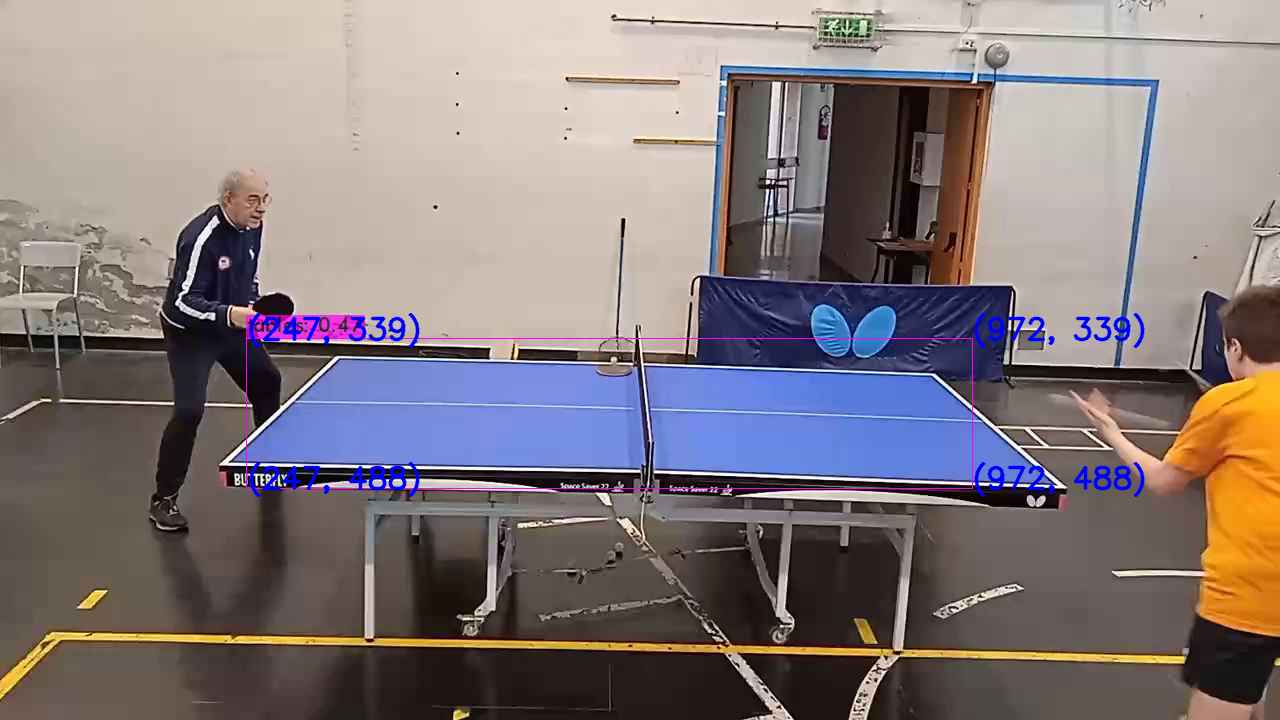

In [9]:
import cv2
    
# path
path = r'/content/gdrive/MyDrive/yolov4piford/darknet/predictions.jpg'
    
# Reading an image in default mode
image = cv2.imread(path)
    
# Window name in which image is displayed
window_name = 'Image'
  
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
#org1 = (247,339)
org1 = top_left
text1=str(org1)

#org2 = (972, 329)
org2 = top_right
text2=str(org2)

#org3 = (237, 488)
org3 = bottom_left
text3=str(org3)

#org4 = (962, 488)
org4 = bottom_right
text4=str(org4)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
image = cv2.putText(image, text1, org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

image = cv2.putText(image, text2, org2, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

image = cv2.putText(image, text3, org3, font, 
                   fontScale, color, thickness, cv2.LINE_AA)

image = cv2.putText(image, text4, org4, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
   
# Displaying the image
from google.colab.patches import cv2_imshow
cv2_imshow(image)
#cv2.imshow(window_name, image) 

if cv2.waitKey(0) & 0xFF == ord('q'): 
    cv2.destroyAllWindows()
